In [2]:
!pip install pingouin

   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/198.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/198.9 kB ? eta -:--:--
   ------------ -------------------------- 61.4/198.9 kB 469.7 kB/s eta 0:00:01
   ------------------------- ------------ 133.1/198.9 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------- 198.9/198.9 kB 1.0 MB/s eta 0:00:00


# LAB 1

In [9]:
from pingouin import ttest
import pandas as pd

seoul = pd.read_csv("seoul_real_estate.csv")
seoul['DEAL_YMD'] = pd.to_datetime(seoul['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([2,3]))]

jan_df = apt_df[apt_df['month'] == 2]
feb_df = apt_df[apt_df['month'] == 3]

print('1월 아파트 평균 가격(만원) : ', jan_df['OBJ_AMT'].mean())
print('2월 아파트 평균 가격(만원) : ', feb_df['OBJ_AMT'].mean())

1월 아파트 평균 가격(만원) :  109103.32604817128
2월 아파트 평균 가격(만원) :  101885.99666790078


# LAB 2

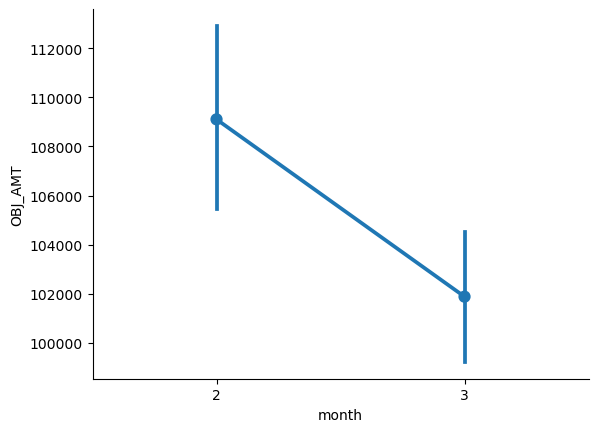

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.pointplot(x= 'month', y='OBJ_AMT', data=apt_df)
sns.despine()

plt.savefig('stat01.png', dpi=200)
plt.show()

# LAB 3

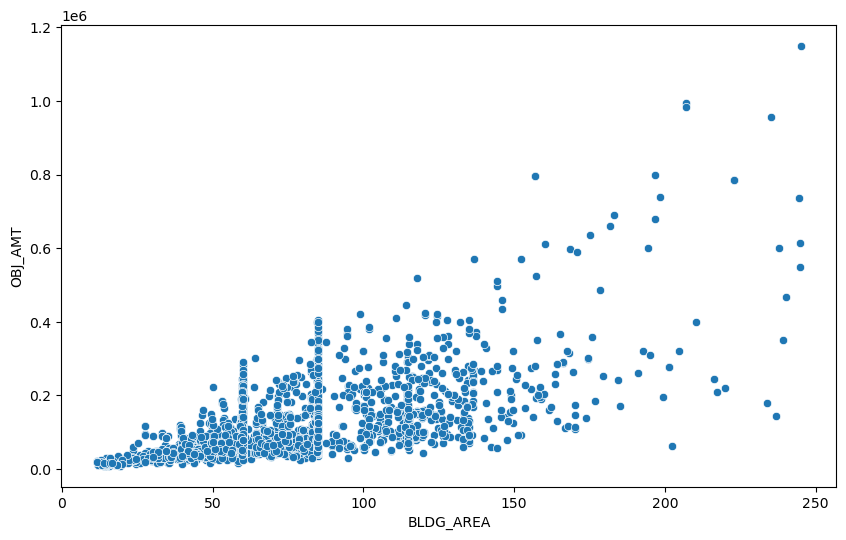

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

seoul = pd.read_csv("seoul_real_estate.csv")
seoul['DEAL_YMD'] = pd.to_datetime(seoul['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month

apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([2,3]))]

corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

fig. ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='BLDG_AREA', y='OBJ_AMT', data=corr_df)

plt.savefig('stat02.png', dpi=200)
plt.show()

In [14]:
import pingouin as pg
pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,4943,0.618,"[0.6, 0.64]",0.0,inf,1.0


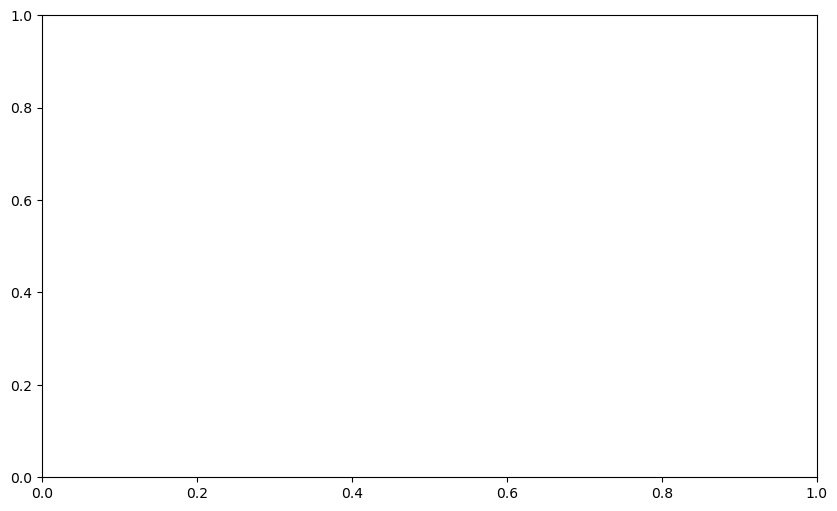

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['DEAL_YMD'] = pd.to_datetime(seoul['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([2,3]))]

corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

corr_coef = pg.corr(corr_df['BLDG_AREA'], corr_df['OBJ_AMT']).round(3)['r'].values[0]

fig.ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='BLDG_AREA', y='OBJ_AMT', data=corr_df, ax = ax)
ax.text(0.95, 0.05, f'Person Corelation : {corr_coef:.2f}',
        transform = ax.transAxes, ha='right', fontsize=12)

plt.savefig('stat03.png', dpi=200)
plt.show()

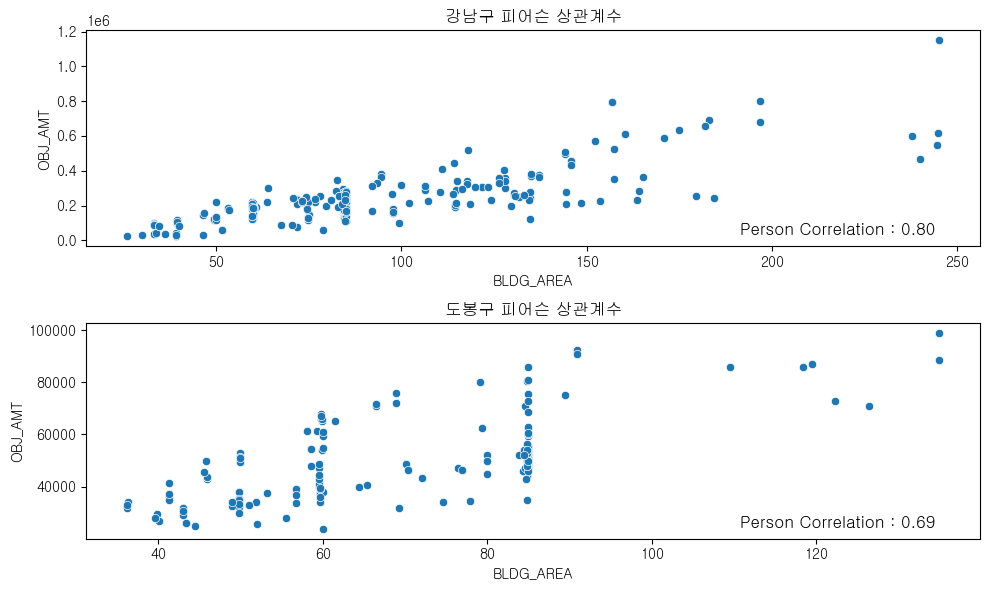

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['DEAL_YMD'] = pd.to_datetime(seoul['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([2,3]))]

corr_df = apt_df[['DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA', 'SGG_NM', 'month']].reset_index(drop=True)

sgg_nm = ['강남구', '도봉구']

fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
for i in range(len(sgg_nm)) :
    sgg_df = corr_df[corr_df['SGG_NM'] == sgg_nm[i]]
    corr_coef = pg.corr(sgg_df['BLDG_AREA'], sgg_df['OBJ_AMT']).round(3)['r'].values[0]

    sns.scatterplot(x='BLDG_AREA', y='OBJ_AMT', data=sgg_df, ax=ax[i])
    ax[i].text(0.95, 0.05, f'Person Correlation : {corr_coef:.2f}',
               transform=ax[i].transAxes, ha='right', fontsize=12)
    ax[i].set_title(f'{sgg_nm[i]} 피어슨 상관계수')

plt.tight_layout()
plt.savefig('stat04.png', dpi=200)
plt.show()